In [44]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud

# Setting the default template for Plotly
pio.templates.default = "plotly_white"

# File path
file_path = r"C:\Users\Arsal Naveed\Desktop\AICP Internship\week_05\Instagram data.csv"

# Loading the dataset 
df = pd.read_csv(file_path, encoding='latin1')

# Q.1: Show column names and have a look at their info.
print("Column Names:")
print(df.columns)
print("\nInfo:")
print(df.info())

# Q.2: Show the descriptive statistics of the data.
print("\nDescriptive Statistics:")
print(df.describe())

# Q.3: Check if your data contains any missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Q.4: Explore the distribution of the Impressions
# Defining the bin edges
bin_edges = list(range(0, 40001, 5000))

# Creating the histogram
fig = px.histogram(df, x='Impressions', title='Distribution of Impressions', nbins=len(bin_edges), range_x=[0, 40000])

# Updating the x-axis ticks and labels
fig.update_xaxes(tickvals=bin_edges, ticktext=[str(i) for i in bin_edges])

# Updating the y-axis range
fig.update_yaxes(range=[0, 70])

# Showing the plot
fig.show()


Column Names:
Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dty

In [45]:
# Creating a line plot for impressions over time using index
fig = px.line(df, y='Impressions', title='Impressions Over Time')
fig.update_xaxes(title='Index')
fig.update_yaxes(title='Impressions')
fig.show()


In [46]:
# Creating a line plot for metrics over time using index
fig = go.Figure()

# Adding traces for each metric
metrics = ['Likes', 'Saves', 'Follows']
colors = ['blue', 'green', 'red']

for metric, color in zip(metrics, colors):
    fig.add_trace(go.Scatter(x=df.index, y=df[metric], mode='lines', name=metric, line=dict(color=color)))

# Updating the layout
fig.update_layout(title='Metrics Over Time',
                  xaxis_title='Index',
                  yaxis_title='Metrics')

# Showing the plot
fig.show()


In [47]:
# Calculating the total reach from each source
df['Total Reach'] = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum(axis=1)

# Calculating percentage reach from each source
for col in ['From Home', 'From Hashtags', 'From Explore', 'From Other']:
    df[col + ' %'] = df[col] / df['Total Reach'] * 100

# Aggregating average percentage reach for each source
avg_percentage_reach = df[['From Home %', 'From Hashtags %', 'From Explore %', 'From Other %']].mean()

# Creating a pie chart for the percentage distribution of reach from different sources
fig = px.pie(values=avg_percentage_reach, names=avg_percentage_reach.index,
             title='Average Percentage Distribution of Reach from Different Sources')

# Showing the plot
fig.show()


In [48]:
# Calculating the total engagement from each source
df['Total Engagement'] = df[['Likes', 'Shares', 'Saves', 'Comments']].sum(axis=1)

# Calculating percentage engagement from each source
for col in ['Likes', 'Shares', 'Saves', 'Comments']:
    df[col + ' %'] = df[col] / df['Total Engagement'] * 100

# Aggregating average percentage engagement for each source
avg_percentage_engagement = df[['Likes %', 'Shares %', 'Saves %', 'Comments %']].mean()

# Creating a pie chart for the percentage distribution of engagement from different sources
fig = px.pie(values=avg_percentage_engagement, names=avg_percentage_engagement.index,
             title='Average Percentage Distribution of Engagement from Different Sources')

# Showing the plot
fig.show()


In [49]:
# Creating a scatter plot for the relationship between profile visits and follows
fig = px.scatter(df, x='Profile Visits', y='Follows', title='Relationship between Profile Visits and Follows')

# Calculating the trend line (best-fit line) using numpy.polyfit
m, b = np.polyfit(df['Profile Visits'], df['Follows'], 1)
trend_line_x = np.array([df['Profile Visits'].min(), df['Profile Visits'].max()])
trend_line_y = m * trend_line_x + b

# Adding the trend line to the scatter plot
fig.add_trace(px.line(x=trend_line_x, y=trend_line_y).data[0])

# Showing the plot
fig.show()


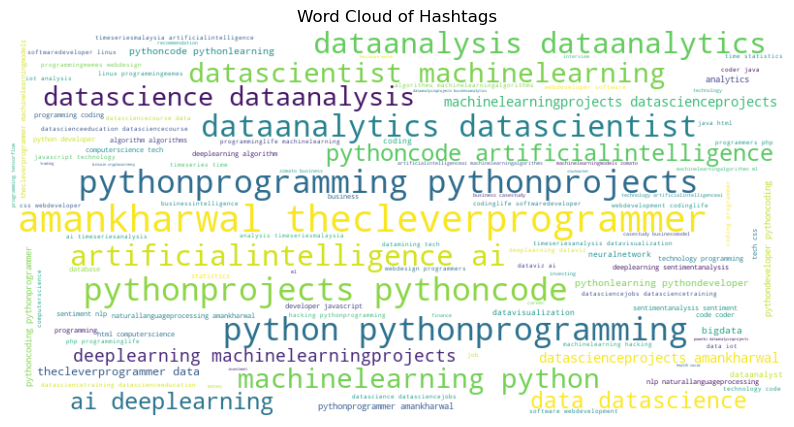

In [50]:
# Concatenating all hashtags into a single string
all_hashtags = ' '.join(df['Hashtags'].astype(str))

# Creating a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_hashtags)

# Displaying the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()


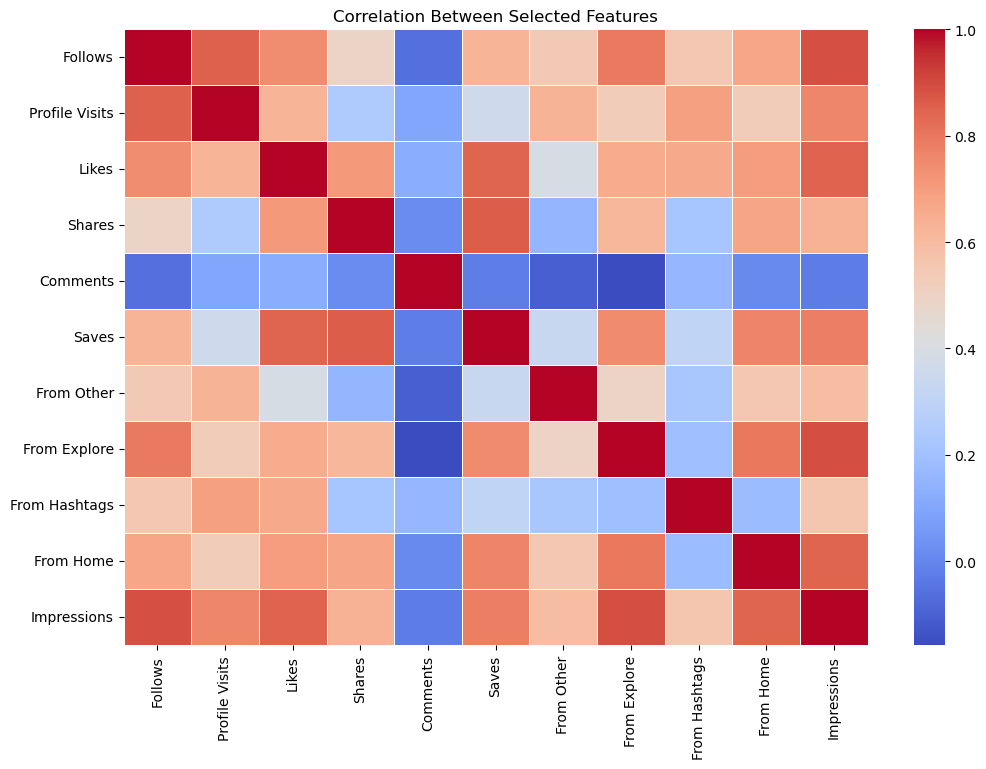

In [51]:
# Selecting the specified features
selected_features = ['Follows', 'Profile Visits', 'Likes', 'Shares', 'Comments', 'Saves', 
                     'From Other', 'From Explore', 'From Hashtags', 'From Home', 'Impressions']

# Subseting the DataFrame with the selected features
selected_df = df[selected_features]

# Calculating the correlation matrix
correlation_matrix = selected_df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Selected Features')
plt.show()


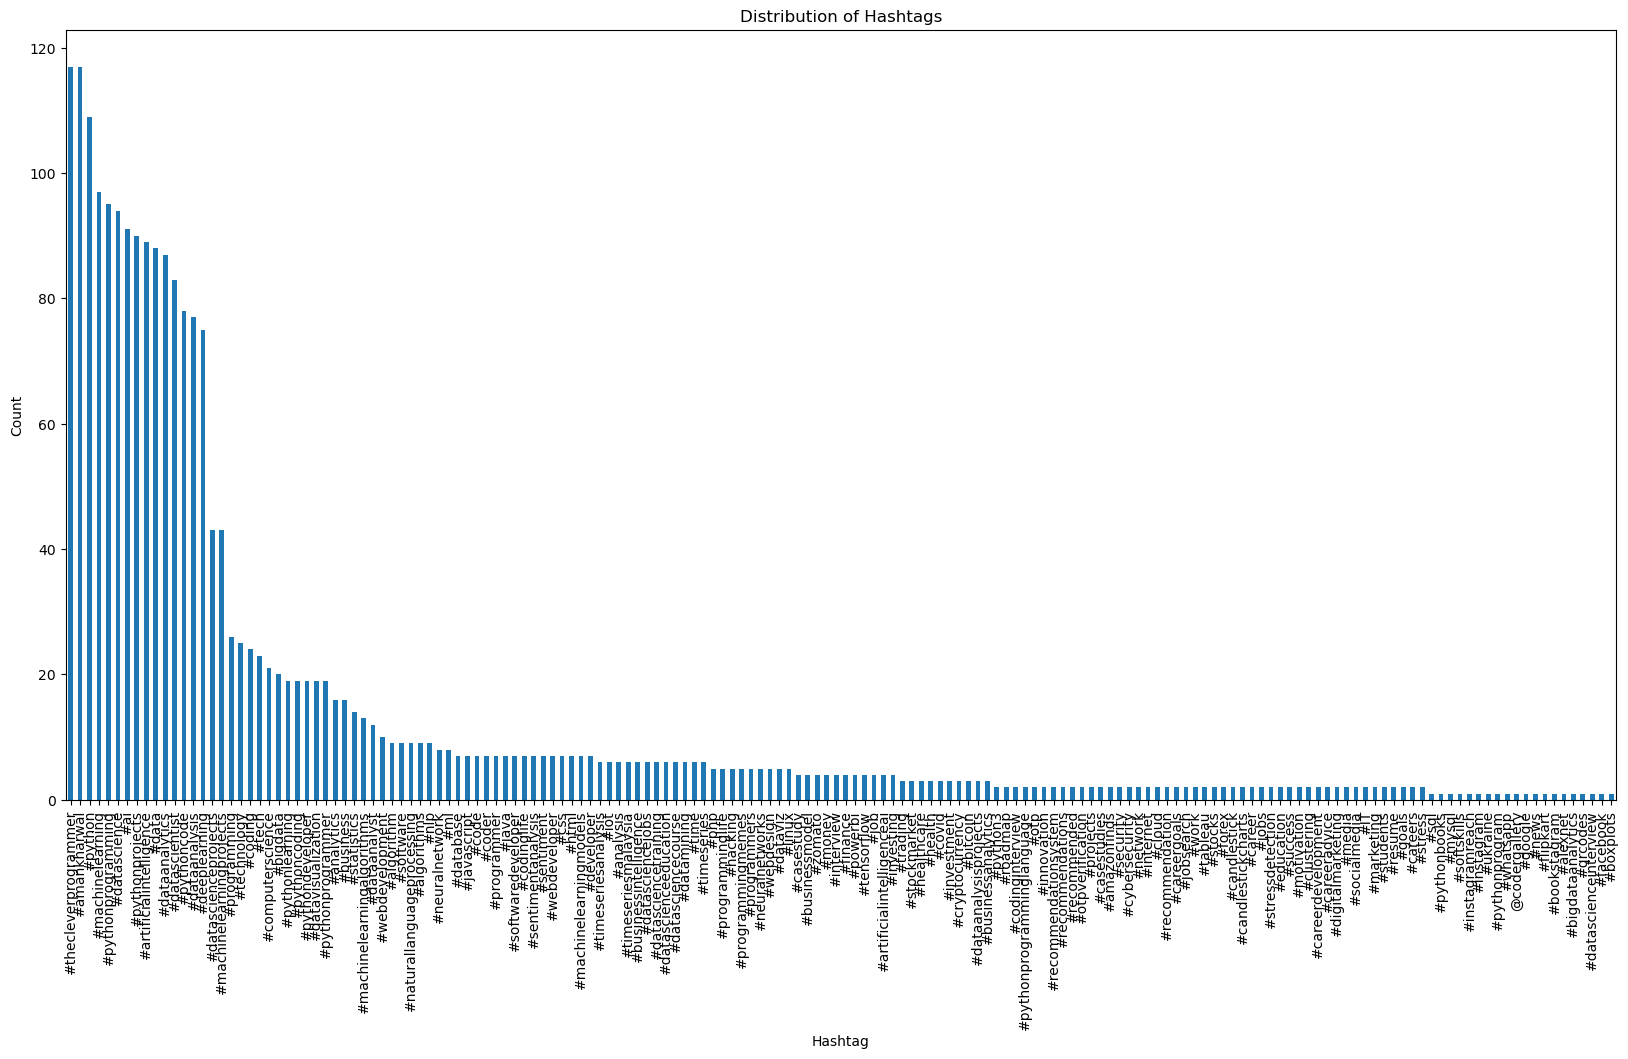

In [52]:
# Extracting the hashtags
hashtags = df["Hashtags"].str.split()

# Flattening the list of hashtags
all_hashtags = [tag for sublist in hashtags for tag in sublist]

# Counting the occurrences of each hashtag
hashtag_counts = pd.Series(all_hashtags).value_counts()

# Ploting the distribution of hashtags
plt.figure(figsize=(20, 10))
hashtag_counts.plot(kind="bar")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.title("Distribution of Hashtags")
plt.show()


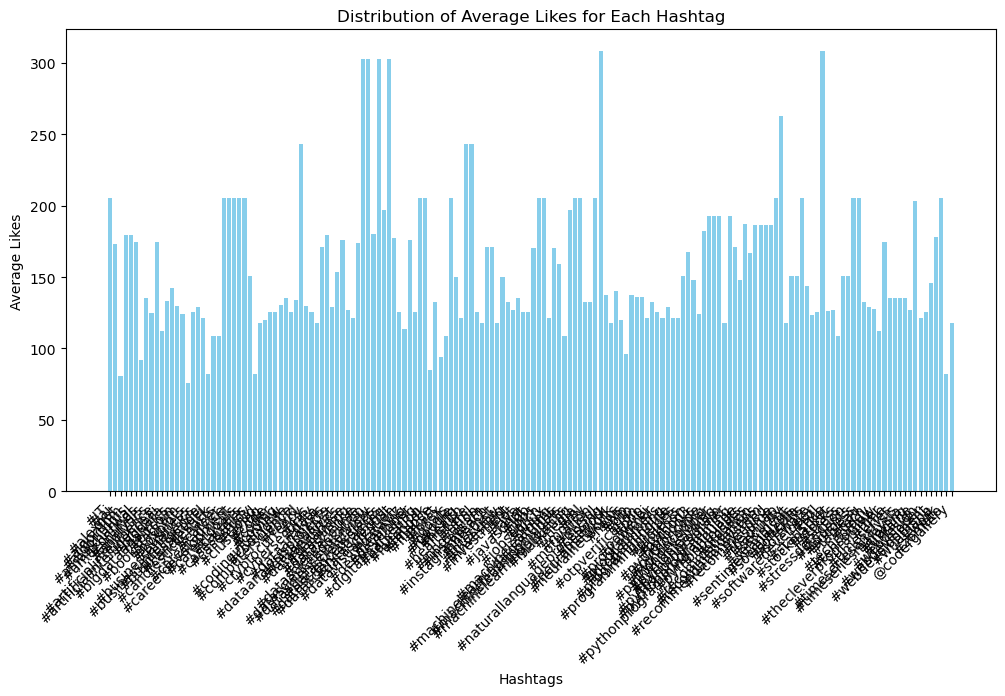

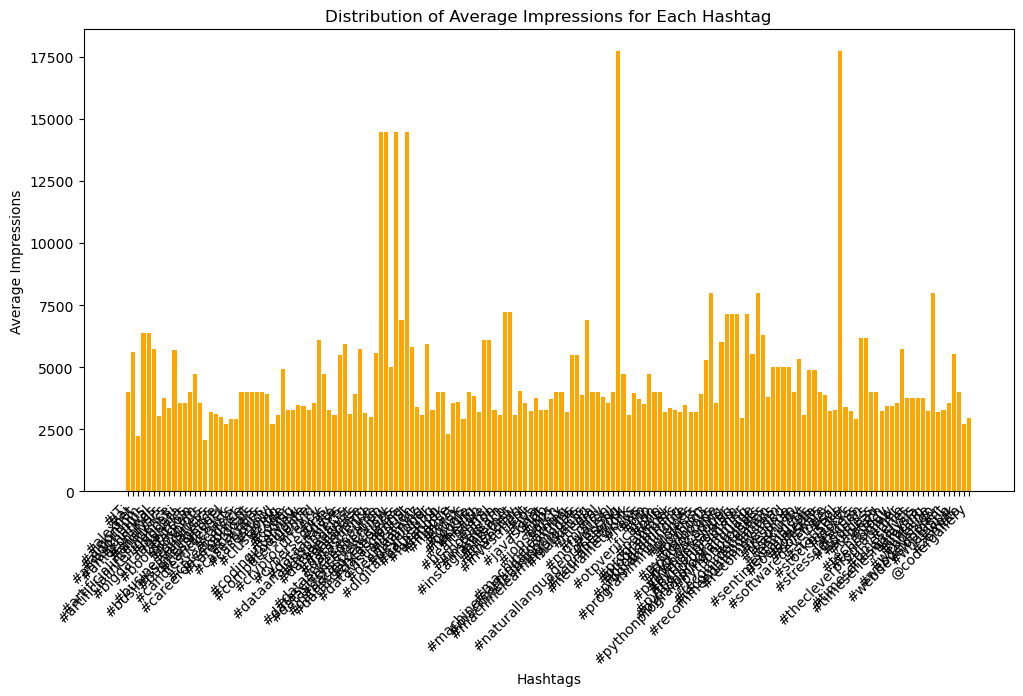

In [53]:

# Spliting hashtags into individual tags
hashtags_split = df['Hashtags'].str.split()

# Creating a list to store the hashtags and corresponding likes and impressions
hashtag_data = []

# Iterating over each row to extract likes, impressions, and hashtags
for i, row in df.iterrows():
    likes = row['Likes']
    impressions = row['Impressions']
    hashtags = hashtags_split[i]
    for hashtag in hashtags:
        hashtag_data.append({'Hashtag': hashtag, 'Likes': likes, 'Impressions': impressions})

# Creating a DataFrame from the list of dictionaries
hashtag_data_df = pd.DataFrame(hashtag_data)

# Calculating the average likes and impressions for each hashtag
average_data = hashtag_data_df.groupby('Hashtag').mean().reset_index()

# Ploting the distribution of average likes for each hashtag
plt.figure(figsize=(12, 6))
plt.bar(average_data['Hashtag'], average_data['Likes'], color='skyblue')
plt.title('Distribution of Average Likes for Each Hashtag')
plt.xlabel('Hashtags')
plt.ylabel('Average Likes')
plt.xticks(rotation=45, ha='right')
plt.show()

# Ploting the distribution of average impressions for each hashtag
plt.figure(figsize=(12, 6))
plt.bar(average_data['Hashtag'], average_data['Impressions'], color='orange')
plt.title('Distribution of Average Impressions for Each Hashtag')
plt.xlabel('Hashtags')
plt.ylabel('Average Impressions')
plt.xticks(rotation=45, ha='right')
plt.show()


In [54]:
summary = """
1. The reach derived from various sources:
   
   The majority of impressions came from "From Home" and "From Hashtags," with "From Explore" and "From Other" coming in second and third.
   
2. Distribution of Sources of Engagement:

   Engagement is increased via comments, likes, shares, saves, and shares. The most popular type of interaction was liking, which was followed by comments, shares, and saves.

3. Connection between Followers and Profile Visits:

   Higher profile visitors may result in more follows, as there seems to be a positive association between the two metrics.

4. Hashtag Distribution:

   There was a difference in the frequency of usage between hashtags. Popular subjects or themes were indicated by the frequency of various hashtags, as shown by a word cloud analysis.

5. Correlation between the Features:

   Possible correlations between various components of Instagram postings were discovered by correlation analysis between features like Likes, Followers, Profile Visits, and others.

6. The breakdown of impressions and likes by hashtag:

   Each hashtag had a different distribution of average likes and impressions, which showed how different hashtags affected reach and engagement.
"""

print(summary)



1. The reach derived from various sources:
   
   The majority of impressions came from "From Home" and "From Hashtags," with "From Explore" and "From Other" coming in second and third.
   
2. Distribution of Sources of Engagement:

   Engagement is increased via comments, likes, shares, saves, and shares. The most popular type of interaction was liking, which was followed by comments, shares, and saves.

3. Connection between Followers and Profile Visits:

   Higher profile visitors may result in more follows, as there seems to be a positive association between the two metrics.

4. Hashtag Distribution:

   There was a difference in the frequency of usage between hashtags. Popular subjects or themes were indicated by the frequency of various hashtags, as shown by a word cloud analysis.

5. Correlation between the Features:

   Possible correlations between various components of Instagram postings were discovered by correlation analysis between features like Likes, Followers, Profile 